In [1]:
from brian2 import *
%matplotlib inline

In [9]:
def perform_single_neruon_test_with_b(b):
    start_scope()

    tau = 1*ms

    eqs = '''
    dv/dt = ((0.04*v**2)/mV + 5*v + 140*mV - u)/tau : volt
    du/dt = a * (b*v - u)/tau : volt
    '''

    a = 0.0275; # b = b;
    c = -65*mV; d = 8*mV

    G = NeuronGroup(1, eqs, threshold='v>=30*mV', reset='''v=c; u=u+d''', method='euler')
    G.v[0] = -65*mV

    statemon_v = StateMonitor(G[:], 'v', record=True)
    statemon_u = StateMonitor(G[:], 'u', record=True)
    spikemon = SpikeMonitor(G[:], variables='v')

    run_time = 1000
    run(run_time*ms)

    # create spike plots
    figure(figsize=(9, 4))
    for l in range(11):
        axvline(l*int(run_time/10), ls='--', c='k')
    axhline(30, ls='-', c='lightgray', lw=3)
    plot(statemon_v.t/ms, statemon_v.v.T/mV, '-', label='v')
    plot(statemon_u.t/ms, statemon_u.u.T/mV, '-', label='u')
    xlabel('Time (ms)')
    ylabel('v (mV)')
    output_rates = spikemon.num_spikes/(run_time*ms)
    title('Plot for constant parametrisation, with a='+"{:5.4f}".format(a)+
          ', b='+"{:4.3f}".format(b)+
#           ', I='+"{:3.2f}".format(I)+  # not used; I=0.
          '. Oscillating at '+str(output_rates));
    print("avg. network firing rate: ", output_rates)

avg. network firing rate:  0. Hz


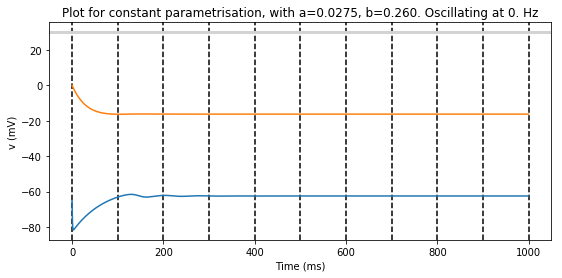

In [10]:
perform_single_neruon_test_with_b(0.26)

avg. network firing rate:  12. Hz


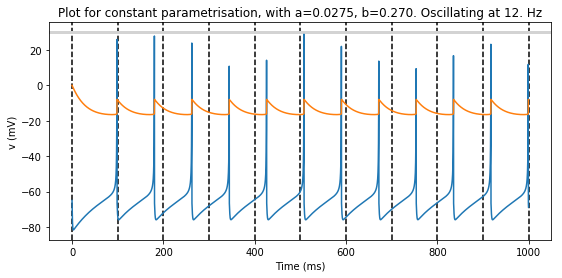

In [11]:
perform_single_neruon_test_with_b(0.27)